In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('E:\\syntax code\\python\jupytr\\neural network\\diabetes\\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df['Outcome']
import matplotlib.pyplot as plt
import seaborn as sns

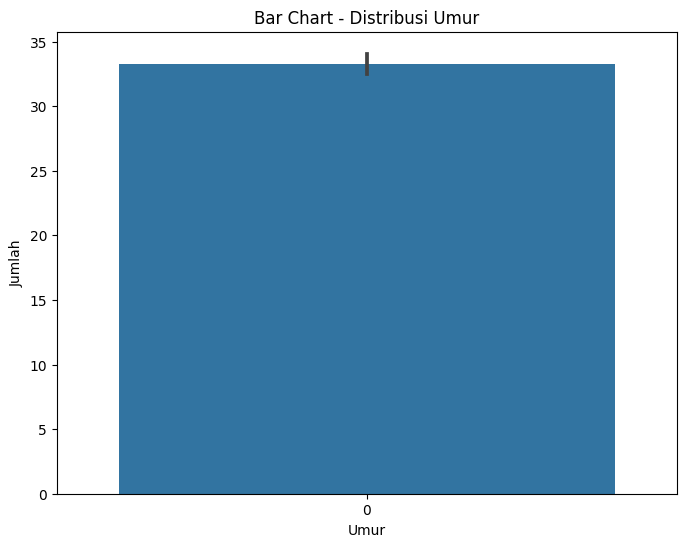

In [4]:
plt.figure(figsize=(8, 6))
sns.barplot(  data=df['Age'])
plt.title('Bar Chart - Distribusi Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.show()

In [5]:
df['BloodPressure'].max()

122

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data_describe=df.describe()
from docx import Document

In [9]:
data_describe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df_describe = pd.DataFrame(data_describe, index=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

# Membuat dokumen Word baru
doc = Document()

# Menambahkan tabel ke dalam dokumen Word
doc.add_table(rows=len(df_describe) + 1, cols=len(df_describe.columns), style='Table Grid')
table = doc.tables[0]

# Menambahkan header tabel
for col_num, column_name in enumerate(df_describe.columns):
    table.cell(0, col_num).text = column_name

# Menambahkan data ke dalam tabel
for row_num, row_data in enumerate(df_describe.itertuples(index=True, name=None)):
    row_cells = table.rows[row_num + 1].cells
    for col_num, cell_value in enumerate(row_data[1:]):
        row_cells[col_num].text = str(cell_value)

# Simpan dokumen Word
doc.save('data_describe.docx')

NameError: name 'data_describe' is not defined

In [11]:
df.duplicated().sum()

0

In [4]:
X=df.drop(columns='Outcome',axis=1)
y=df['Outcome']

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model ann

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, f1_score,recall_score
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import to_categorical
import tensorflow as tf 

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Normalisasi data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Membuat model Artificial Neural Network (ANN) dengan perubahan
model_ann = Sequential([
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(units=64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(units=72, activation='relu'),
    Dropout(0.5),
    Dense(units=2, activation='softmax')
])

# Compile model dengan optimizer RMSprop dan learning rate yang mungkin perlu disesuaikan
model_ann.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='Adam', metrics=['accuracy'])

# Melatih model
finalann = model_ann.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

#model_ann.save('diabetes_ANN.h5')
# Evaluasi model
loss, accuracy = model_ann.evaluate(X_test, y_test)

# Prediksi
y_pred_prob = model_ann.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)





y_pred_binary = (y_pred > 0.5).astype(int)
# Now you can use y_pred for evaluation metrics
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("R2 score: {}".format(r2_score(y_test, y_pred)))
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: {}".format(f1))



# Pastikan y_test dan y_pred adalah array satu dimensi
y_test_single_dim = y_test.ravel()
y_pred_single_dim = y_pred_binary.ravel()
# Menampilkan classification report
print(classification_report(y_test_single_dim, y_pred_single_dim))


Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 1.1438 - accuracy: 0.5765 - val_loss: 1.0111 - val_accuracy: 0.6688
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 1.0646 - accuracy: 0.6466 - val_loss: 0.9601 - val_accuracy: 0.6753
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 1.0235 - accuracy: 0.6564 - val_loss: 0.9189 - val_accuracy: 0.6883
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9956 - accuracy: 0.6401 - val_loss: 0.8806 - val_accuracy: 0.6818
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9243 - accuracy: 0.6857 - val_loss: 0.8487 - val_accuracy: 0.7143
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.8996 - accuracy: 0.6954 - val_loss: 0.8152 - val_accuracy: 0.7078
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.8426 - accuracy: 0.7166 - val_loss: 0.7873 - val_accuracy: 0.7143
Epoch 8/100


In [8]:
import json

# Asumsikan Anda memiliki instance model 'model_ann'

'''# Serialize arsitektur model ke dalam format JSON
model_json = model_ann.to_json()

# Simpan arsitektur model ke dalam file
with open('model_architecture.json', 'w') as outfile:
    outfile.write(model_json)

# Serialize bobot model ke dalam format JSON
model_weights = model_ann.get_weights()
weights_json = [weight.tolist() for weight in model_weights]

# Simpan bobot model ke dalam file
with open('model_weights.json', 'w') as outfile:
    json.dump(weights_json, outfile)'''

from tensorflow.keras.models import load_model

# Simpan model ke dalam file H5
model_ann.save('model_ANN.h5')
print("Arsitektur model dan bobot berhasil disimpan ke file JSON")

Arsitektur model dan bobot berhasil disimpan ke file JSON


Load model NN

In [16]:
from tensorflow.keras.models import load_model

# ...

# Memuat model yang telah disimpan
loaded_model = load_model('E:\\syntax code\\python\\jupytr\\neural network\\diabetes\\diabetes_ANN.h5')

# Membuat prediksi dengan model yang dimuat
y_pred_prob_loaded = loaded_model.predict(X_test_scaled)
y_pred_loaded = (y_pred_prob_loaded > 0.5).astype(int)

# Now you can use y_pred_loaded for evaluation metrics
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)
f1_loaded = f1_score(y_test, y_pred_loaded, average='weighted')

print("Accuracy score (loaded model): {}".format(accuracy_loaded))
print("MSE (loaded model): {}".format(mse_loaded))
print("R2 score (loaded model): {}".format(r2_loaded))
print("F1 Score (loaded model): {}".format(f1_loaded))


OSError: No file or directory found at E:\syntax code\python\jupytr\neural network\diabetes\diabetes_ANN.h5

In [ ]:
'''import pickle

with open('diabetes_ANN.pkl', 'wb') as file:
    pickle.dump(model_ann, file)'''

"import pickle\n\nwith open('diabetes_ANN.pkl', 'wb') as file:\n    pickle.dump(model_ann, file)"

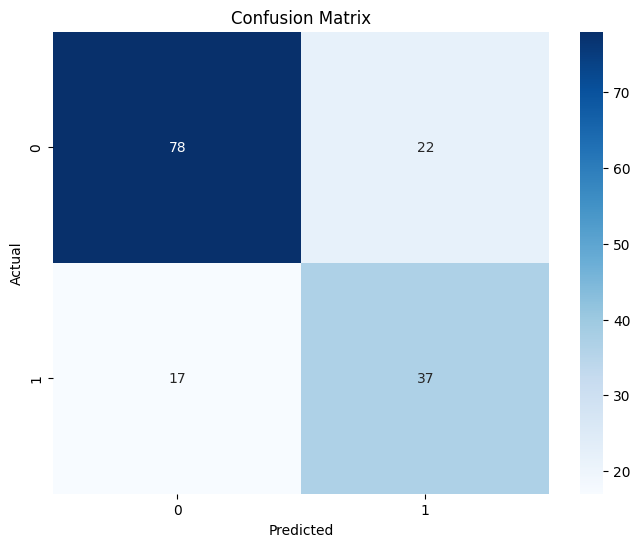

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_labels = np.argmax(y_test, axis=1)

# Kemudian, gunakan LabelEncoder
y_test_encoded = le.fit_transform(y_test_labels)
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_encoded = le.transform(y_pred_labels)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

model dari bard

In [ ]:
from tensorflow.keras import regularizers

from sklearn.model_selection import cross_val_score
def buildclassifier():
    classifier = Sequential() #initialize NN
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu', input_dim =X_train.shape[1]))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier
baru=buildclassifier()
history = baru.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
loss, accuracy = baru.evaluate(X_test, y_test)

y_pred_prob = baru.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert to one-hot encoded if needed
# y_pred_one_hot = to_categorical(y_pred, num_classes=num_classes)

# Now you can use y_pred for evaluation metrics
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("R2 score: {}".format(r2_score(y_test, y_pred)))
f1 = f1_score(y_test, y_pred, average='weighted') 
print("F1 Score: {}".format(f1))


Epoch 1/100


ValueError: in user code:

    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 2432, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py", line 5809, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 2)).


kompleks model


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_complex_model(input_dim):
    model = Sequential()
    
    # Layer input
    model.add(Dense(units=128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.1))  # Dropout layer untuk mencegah overfitting
    
    # Hidden layers
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.1))
    
    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Mendefinisikan input_dim (sesuai dengan jumlah fitur pada dataset Anda)
input_dim = 8  # Sesuaikan dengan jumlah fitur pada dataset diabetes Anda

# Membuat model
complex_model = create_complex_model(input_dim)

# Melatih model (gantilah X_train, y_train sesuai dengan dataset Anda)
history = complex_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model pada data uji (gantilah X_test, y_test sesuai dengan dataset Anda)
loss, accuracy = complex_model.evaluate(X_test, y_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.preprocessing import LabelEncoder
y_pred_prob = complex_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert to one-hot encoded if needed
# y_pred_one_hot = to_categorical(y_pred, num_classes=num_classes)

# Now you can use y_pred for evaluation metrics
print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("R2 score: {}".format(r2_score(y_test, y_pred)))
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change the average parameter as needed

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

print("F1 Score: {}".format(f1))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Epoch 1/100


ValueError: in user code:

    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 2432, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\Lucky_seven\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py", line 5809, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 1) vs (None, 2)).


In [ ]:
'''import pickle

with open('diabetes_kompleks.sav', 'wb') as file:
    pickle.dump(complex_model, file)
'''

"import pickle\n\nwith open('diabetes_kompleks.sav', 'wb') as file:\n    pickle.dump(complex_model, file)\n"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ValueError: y should be a 1d array, got an array of shape (154, 2) instead.

menggunakan model CNN


In [ ]:
# Standarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Neural Network
model_nn = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])
# Kompilasi model
model_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
model_nn.fit(X_train, y_train, epochs=200, batch_size=256, validation_data=(X_test, y_test))
loss, accuracy = model_nn.evaluate(X_test, y_test)
model_nn.save('diabetes_CNN.h5')


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.preprocessing import LabelEncoder
y_pred_prob = model_nn.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Convert to one-hot encoded if needed
# y_pred_one_hot = to_categorical(y_pred, num_classes=num_classes)

# Now you can use y_pred for evaluation metrics
print("Accuracy score: {}".format(accuracy))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("R2 score: {}".format(r2_score(y_test, y_pred)))
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change the average parameter as needed
'''
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

print("F1 Score: {}".format(f1))
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
'''

Epoch 1/200
3/3 [==============================] - 1s 72ms/step - loss: 0.7285 - accuracy: 0.3502 - val_loss: 0.6938 - val_accuracy: 0.3961
Epoch 2/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6896 - accuracy: 0.4674 - val_loss: 0.6676 - val_accuracy: 0.6883
Epoch 3/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6585 - accuracy: 0.6971 - val_loss: 0.6458 - val_accuracy: 0.7338
Epoch 4/200
3/3 [==============================] - 0s 38ms/step - loss: 0.6331 - accuracy: 0.7394 - val_loss: 0.6269 - val_accuracy: 0.7403
Epoch 5/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6121 - accuracy: 0.7557 - val_loss: 0.6094 - val_accuracy: 0.7338
Epoch 6/200
3/3 [==============================] - 0s 13ms/step - loss: 0.5920 - accuracy: 0.7557 - val_loss: 0.5939 - val_accuracy: 0.7273
Epoch 7/200
3/3 [==============================] - 0s 16ms/step - loss: 0.5644 - accuracy: 0.7687 - val_loss: 0.5800 - val_accuracy: 0.7273
Epoch 8/200
3/3 [===

'\n# Confusion Matrix\nconf_matrix = confusion_matrix(y_test, y_pred)\n\n# Classification Report\nclass_report = classification_report(y_test, y_pred)\n\nprint("F1 Score: {}".format(f1))\nprint("\nConfusion Matrix:")\nprint(conf_matrix)\nprint("\nClassification Report:")\nprint(class_report)\n'

In [ ]:
'''import pickle

with open('diabetes_CNN.sav', 'wb') as file:
    pickle.dump(model_nn, file)
'''

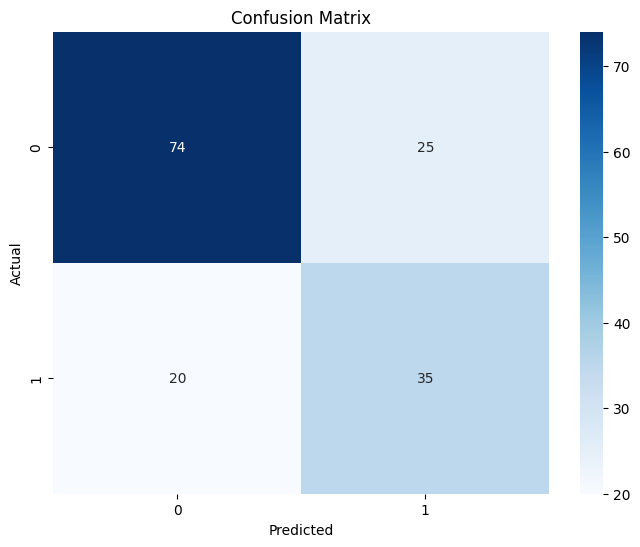

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred_encoded)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')

plt.ylabel('Actual')
plt.show()

model LSTM


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Membaca dataset

# Standarisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah dimensi data untuk LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Membuat model LSTM dengan optimizator Adam
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))

# Kompilasi model dengan optimizator Adam
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model
model_lstm.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_data=(X_test_lstm, y_test))

loss, accuracy = complex_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/10
10/10 [==============================] - 2s 44ms/step - loss: 0.6893 - accuracy: 0.5619 - val_loss: 0.6767 - val_accuracy: 0.6299
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6698 - accuracy: 0.6531 - val_loss: 0.6591 - val_accuracy: 0.6948
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6519 - accuracy: 0.7134 - val_loss: 0.6425 - val_accuracy: 0.6948
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6342 - accuracy: 0.7215 - val_loss: 0.6272 - val_accuracy: 0.7013
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6184 - accuracy: 0.7231 - val_loss: 0.6121 - val_accuracy: 0.7143
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6024 - accuracy: 0.7280 - val_loss: 0.5983 - val_accuracy: 0.7078
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.5869 - accuracy: 0.7345 - val_loss: 0.5854 - val_accuracy: 0.7078
Epoch 8/10
10/10 [=